# Signals
- Generate a buy, sell signal depending on the following conditions:
    - Cross-over of 5-day and 20-day moving averages.
    - Market sentiment is positive.
    - ARIMA model predicts an increase in the stock price.
    - RSI (relative strength index)

- Consider 30 minute intervals for stock price data

In [2]:
import strategies
import seaborn as sns

import pandas as pd
import datetime as dt

,my_cross_over_strategy,my_mfi,my_roc,my_rsi,my_smi,my_bollinger_bands
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,1.0,NaN,NaN
2023-01-05,NaN,NaN,NaN,1.0,NaN,NaN
2023-01-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-26,NaN,NaN,NaN,NaN,1.0,NaN
2023-12-27,NaN,NaN,NaN,NaN,1.0,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

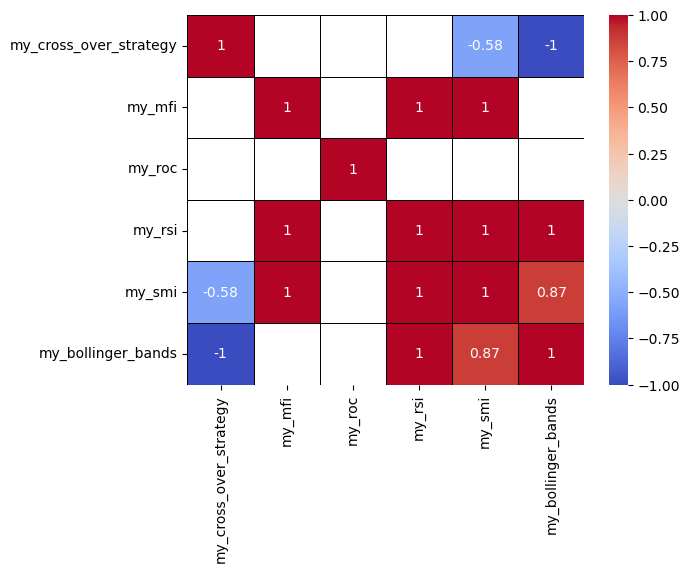

In [2]:
start_date = '2023-01-01'
end_date = '2024-01-01'
ticker = 'LLY'
i = '1d'
plot=False
frame = pd.DataFrame(index = pd.bdate_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date)))


for strategy in ['my_cross_over_strategy', 'my_mfi','my_roc','my_rsi','my_smi','my_bollinger_bands']:
    code = f"""returns = strategies.{strategy}(ticker=ticker, start=start_date, end=end_date, interval=i, plot_graphs=False)"""
    local_scope = {}
    exec(code, globals(), local_scope)
    
    buy_indices =local_scope['returns']['buy']
    sell_indices =local_scope['returns']['sell']
    
    # buy_indices = exec(f"strategies.{strategy}(ticker=ticker, start=start_date, end=end_date, interval=i, plot_graphs=False)")['buy']
    # sell_indices = exec(f"strategies.{strategy}(ticker=ticker, start=start_date, end=end_date, interval=i, plot_graphs=False)['sell']")
    
    for date in buy_indices:
        frame.loc[pd.Timestamp(date).normalize().tz_localize(None), strategy]  = 1 
    for date in sell_indices:
        frame.loc[pd.Timestamp(date).normalize().tz_localize(None), strategy]  = -1
display(frame)


correlation_matrix = frame.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')


In [3]:
strategies.my_mfi(ticker='LLY', start='2023-01-01', end='2024-01-01', interval='1d', period=13, min=20, max=80, plot_graphs=False)

{'buy': DatetimeIndex(['2023-01-23 00:00:00-05:00', '2023-10-02 00:00:00-04:00',
                '2023-10-03 00:00:00-04:00', '2023-10-04 00:00:00-04:00'],
               dtype='datetime64[ns, America/New_York]', name='Date', freq=None),
 'sell': DatetimeIndex(['2023-03-16 00:00:00-04:00', '2023-03-17 00:00:00-04:00',
                '2023-03-20 00:00:00-04:00', '2023-03-21 00:00:00-04:00',
                '2023-03-22 00:00:00-04:00', '2023-03-23 00:00:00-04:00',
                '2023-03-24 00:00:00-04:00', '2023-03-27 00:00:00-04:00',
                '2023-03-28 00:00:00-04:00', '2023-03-29 00:00:00-04:00',
                '2023-03-30 00:00:00-04:00', '2023-04-14 00:00:00-04:00',
                '2023-05-03 00:00:00-04:00', '2023-05-04 00:00:00-04:00',
                '2023-05-05 00:00:00-04:00', '2023-05-08 00:00:00-04:00',
                '2023-05-09 00:00:00-04:00', '2023-05-10 00:00:00-04:00',
                '2023-05-11 00:00:00-04:00', '2023-05-12 00:00:00-04:00',
              

In [4]:
strategies.my_roc(ticker='LLY', start='2023-01-01', end='2024-01-01', interval='1d', shift=9, plot_graphs=False)

{'buy': [Timestamp('2023-08-08 00:00:00-0400', tz='America/New_York')],
 'sell': [Timestamp('2023-11-15 00:00:00-0500', tz='America/New_York')]}

In [5]:
strategies.my_rsi(ticker='LLY', start='2023-01-01', end='2024-01-01', interval='1d', lookback=14, min=30, max=70, plot_graphs=False)

{'buy': [Timestamp('2023-01-04 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-01-05 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-01-09 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-01-10 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-02-02 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-02-28 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-03-01 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-03-02 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-03-03 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-03-06 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-03-07 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-03-08 00:00:00-0500', tz='America/New_York'),
  Timestamp('2023-09-28 00:00:00-0400', tz='America/New_York'),
  Timestamp('2023-09-29 00:00:00-0400', tz='America/New_York'),
  Timestamp('2023-10-02 00:00:00-0400', tz='America/New_York'),
  Timestamp('2023-10-03 00:00:00-

In [6]:
strategies.my_smi(ticker='LLY', start='2023-01-01', end='2024-01-01', interval='1d', lookback=14, smooth_k = 3, smooth_d = 3, min_level=-40, max_level=40, plot_graphs=False)

{'buy': DatetimeIndex(['2023-01-27 00:00:00-05:00', '2023-01-30 00:00:00-05:00',
                '2023-01-31 00:00:00-05:00', '2023-02-01 00:00:00-05:00',
                '2023-02-02 00:00:00-05:00', '2023-02-03 00:00:00-05:00',
                '2023-02-24 00:00:00-05:00', '2023-02-27 00:00:00-05:00',
                '2023-02-28 00:00:00-05:00', '2023-03-01 00:00:00-05:00',
                '2023-03-02 00:00:00-05:00', '2023-03-03 00:00:00-05:00',
                '2023-03-06 00:00:00-05:00', '2023-03-07 00:00:00-05:00',
                '2023-03-08 00:00:00-05:00', '2023-03-09 00:00:00-05:00',
                '2023-03-10 00:00:00-05:00', '2023-03-13 00:00:00-04:00',
                '2023-05-26 00:00:00-04:00', '2023-05-30 00:00:00-04:00',
                '2023-05-31 00:00:00-04:00', '2023-06-01 00:00:00-04:00',
                '2023-07-12 00:00:00-04:00', '2023-07-13 00:00:00-04:00',
                '2023-07-14 00:00:00-04:00', '2023-07-17 00:00:00-04:00',
                '2023-07-18 00:

In [7]:
strategies.my_bollinger_bands(ticker='LLY', start='2023-01-01', end='2024-01-01', interval='1d', lookback=20, num_std_dev=2, plot_graphs=False)

{'buy': DatetimeIndex(['2023-02-02 00:00:00-05:00', '2023-02-16 00:00:00-05:00',
                '2023-02-27 00:00:00-05:00', '2023-02-28 00:00:00-05:00',
                '2023-07-11 00:00:00-04:00', '2023-07-13 00:00:00-04:00',
                '2023-12-14 00:00:00-05:00', '2023-12-15 00:00:00-05:00'],
               dtype='datetime64[ns, America/New_York]', name='Date', freq=None),
 'sell': DatetimeIndex(['2023-04-03 00:00:00-04:00', '2023-04-04 00:00:00-04:00',
                '2023-04-05 00:00:00-04:00', '2023-04-06 00:00:00-04:00',
                '2023-04-10 00:00:00-04:00', '2023-05-01 00:00:00-04:00',
                '2023-05-03 00:00:00-04:00', '2023-05-04 00:00:00-04:00',
                '2023-06-30 00:00:00-04:00', '2023-08-08 00:00:00-04:00',
                '2023-08-09 00:00:00-04:00', '2023-08-10 00:00:00-04:00',
                '2023-08-11 00:00:00-04:00', '2023-08-14 00:00:00-04:00',
                '2023-09-07 00:00:00-04:00', '2023-09-08 00:00:00-04:00',
              